## ARIMA Model

In this section, we will discuss and practice the ARIMA (AutoRegressive Integrated Moving Average) model, a widely used method for time series forecasting. We will explore its basic components, implement it on financial datasets from assets such as TSLA, GOLD, BTC-USD, NVDA, and ^GSPC, and evaluate its performance. Although ARIMA models typically require stationary data, we will simplify the process by skipping the stationarity transformation and directly fitting the model. Lastly, we will forecast the next 20 days using a rolling window approach, showcasing its ability to dynamically update predictions as new data becomes available.

---


#### 1. Introduction to ARIMA Model
The ARIMA (AutoRegressive Integrated Moving Average) model is a widely used statistical technique for time series forecasting. It combines three key components:

1. AR (AutoRegressive): Relies on past values to predict future values.
2. I (Integrated): Applies differencing to make the series stationary by removing trends or seasonality.
3. MA (Moving Average): Uses past forecast errors to adjust predictions.
  
The general ARIMA equation is:
$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t$$
Where:
- $y_t$: The value of the time series at time \( t \).
- $c$: A constant term (optional).
- $\phi_1, \phi_2, \dots, \phi_p$: Coefficients for the AR (AutoRegressive) terms.
- $\theta_1, \theta_2, \dots, \theta_q$: Coefficients for the MA (Moving Average) terms.
- $\epsilon_t$: The error term (white noise) at time \( t \).
- $p$: The number of lagged terms for the AR component.
- $q$: The number of lagged error terms for the MA component.


##### The basic steps in ARIMA modeling involve:

1. Stationarity Check: Ensuring the data has a constant mean and variance over time, often achieved through differencing.
2. Order Selection: Determining the best AR (p), I (d), and MA (q) parameters using techniques like ACF and PACF plots.
3. Model Fitting: Training the ARIMA model on the stationary data.
4. Forecasting: Predicting future values based on the fitted model.
#### 2. Data Sources
For this analysis, we used time series data from the following assets:

- TSLA (Tesla stock)
- GOLD (Gold prices)
- BTC-USD (Bitcoin in USD)
- NVDA (NVIDIA stock)
- GSPC (S&P 500 index)

    These diverse datasets represent stocks, commodities, cryptocurrencies, and indices, offering a broad range of financial time series for analysis.

#### 3. Stationarity and Autocorrelation Check
To assess stationarity, we implemented an autocorrelation check function using Autocorrelation Function (ACF) plots. The results revealed that none of the series were stationary, as they exhibited trends or seasonality.

We can use the code below to difference the data:

data_diff = data.diff().dropna()

While the standard approach involves differencing the data to achieve stationarity, for simplicity, we skipped this step and directly applied the ARIMA model. This decision allowed us to focus on demonstrating the model's implementation and functionality.

#### 4. Forecasting with ARIMA Using a Rolling Window
We defined an ARIMA function to train the model and predict future values. The forecast for the next 20 days was generated using a rolling window approach:

Rolling Window Explanation:

The rolling window technique involves re-training the model iteratively as new data becomes available. At each step, the model is trained on the most recent data within the window and used to make one-step-ahead predictions.
This method improves accuracy by continuously updating the model to reflect the most recent trends and patterns in the data.

#### 5. Further Discussion:

The session will enhance our knowledge in applying advanced statistical models like ARIMA to real-world financial data. ARIMA and its variations, such as Seasonal ARIMA (SARIMA) for seasonal trends, ARIMAX for integrating external variables, and GARIMA for managing volatile data, are critical for forecasting exchange rates, property market trends, and assessing risks. By leveraging these models, the student will analyze historical data, predict future patterns, and improve decision-making accuracy. This practical application strengthens the student’s ability to use time-series analysis in financial and investment contexts, bridging academic theory with industry practice.

### Load Package

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

/Users/charles/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Data Gateher

In [2]:

# Gather data
tickers = ["TSLA", "GOLD", "BTC-USD", "NVDA", "^GSPC"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Close']

# Data cleaning: Fill NA with the last available value
data.fillna(method="ffill", inplace=True)

[*********************100%%**********************]  5 of 5 completed
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_22058/4073518919.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


### Define Autocorrelation Check and ARIMA Function

#### Autocorrelation Check for each Ticker


Exploratory analysis for TSLA
ADF Statistic: -1.8112108747428495
p-value: 0.37491018165055573
The series is not stationary.


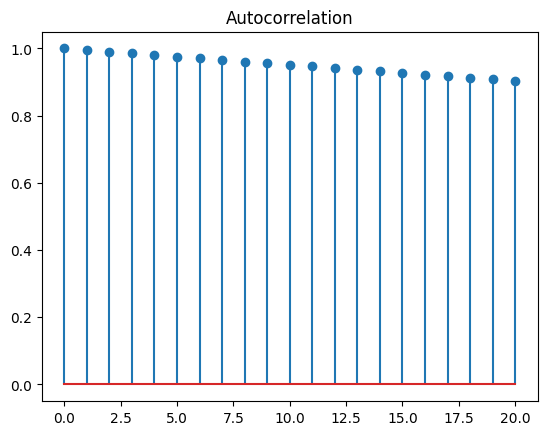


Exploratory analysis for GOLD
ADF Statistic: -1.781638149189406
p-value: 0.3896151904774753
The series is not stationary.


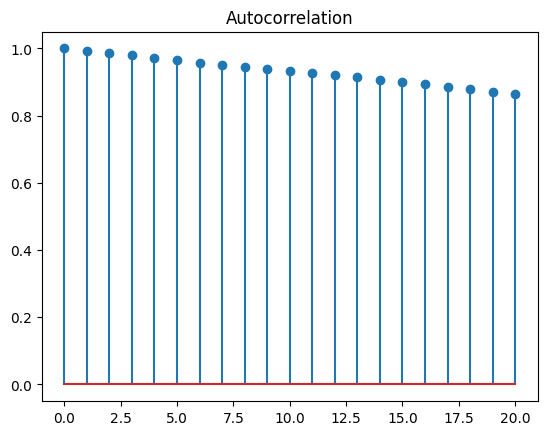


Exploratory analysis for BTC-USD
ADF Statistic: -1.4485668936087963
p-value: 0.5587840249877754
The series is not stationary.


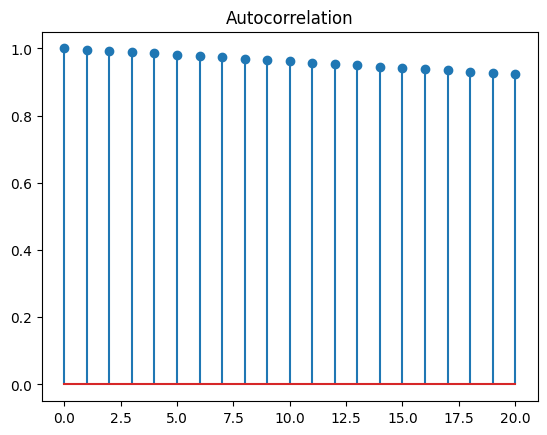


Exploratory analysis for NVDA
ADF Statistic: -1.6883389453173254
p-value: 0.4371303963022078
The series is not stationary.


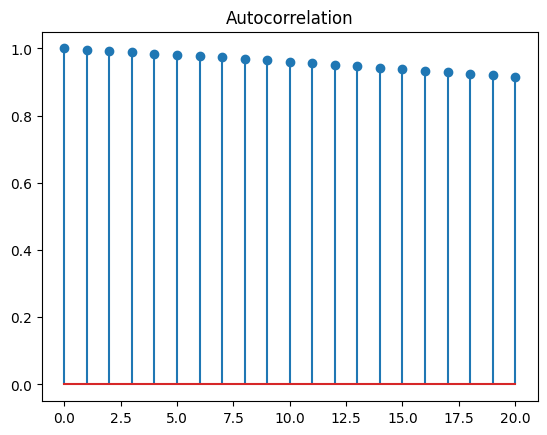


Exploratory analysis for ^GSPC
ADF Statistic: -1.4701613235047966
p-value: 0.5482171029275711
The series is not stationary.


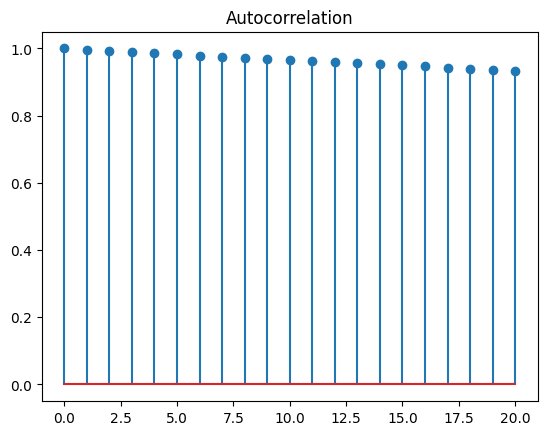

In [5]:

# Exploratory tests: Check stationarity and autocorrelation
def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is not stationary.")

def plot_acf(timeseries, lags=20):
    acf_values = acf(timeseries.dropna(), nlags=lags)
    plt.stem(range(len(acf_values)), acf_values)  # Removed 'use_line_collection=True'
    plt.title("Autocorrelation")
    plt.show()
    
# Stationarity and ACF tests
for ticker in tickers:
    print(f"\nExploratory analysis for {ticker}")
    check_stationarity(data[ticker])
    plot_acf(data[ticker])


#### ARIMA Model Fitting

In [ ]:
# Split data into train and test (80-20 split)
split_ratio = 0.8
train_size = int(len(data) * split_ratio)
train_data = data[:train_size]
test_data = data[train_size:]

# ARIMA modeling
def find_best_arima_model(train, test):
    best_order = None
    best_mse = float("inf")
    best_model = None
    for p in range(0, 3):
        for d in range(0, 2):
            for q in range(0, 3):
                try:
                    model = ARIMA(train, order=(p, d, q))
                    model_fit = model.fit()
                    predictions = model_fit.forecast(steps=len(test))
                    mse = mean_squared_error(test, predictions)
                    if mse < best_mse:
                        best_mse = mse
                        best_order = (p, d, q)
                        best_model = model_fit
                except:
                    continue
    return best_model, best_order



Training ARIMA model for TSLA


/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best ARIMA order for TSLA: (2, 1, 2)
MSE for TSLA: 2607.644008620536

Training ARIMA model for GOLD


/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Best ARIMA order for GOLD: (0, 1, 2)
MSE for GOLD: 25.21985442693426

Training ARIMA model for BTC-USD


/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Best ARIMA order for BTC-USD: (1, 1, 2)
MSE for BTC-USD: 92266492.58908372

Training ARIMA model for NVDA


/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Best ARIMA order for NVDA: (2, 0, 1)
MSE for NVDA: 4.514014479095591

Training ARIMA model for ^GSPC
Best ARIMA order for ^GSPC: (1, 0, 0)
MSE for ^GSPC: 28771.96314073599

TSLA - VaR at 95.0% confidence: -0.06699598320897573
TSLA - Expected Shortfall (ES) at 95.0% confidence: -0.07706252377789007

GOLD - VaR at 95.0% confidence: -0.0345069350618971
GOLD - Expected Shortfall (ES) at 95.0% confidence: -0.04243289750975261

BTC-USD - VaR at 95.0% confidence: -0.06686874274819632
BTC-USD - Expected Shortfall (ES) at 95.0% confidence: -0.07843244021865349

NVDA - VaR at 95.0% confidence: -0.04901791073453658
NVDA - Expected Shortfall (ES) at 95.0% confidence: -0.05784955807778221

^GSPC - VaR at 95.0% confidence: -0.022487829933880647
^GSPC - Expected Shortfall (ES) at 95.0% confidence: -0.02747877578263876


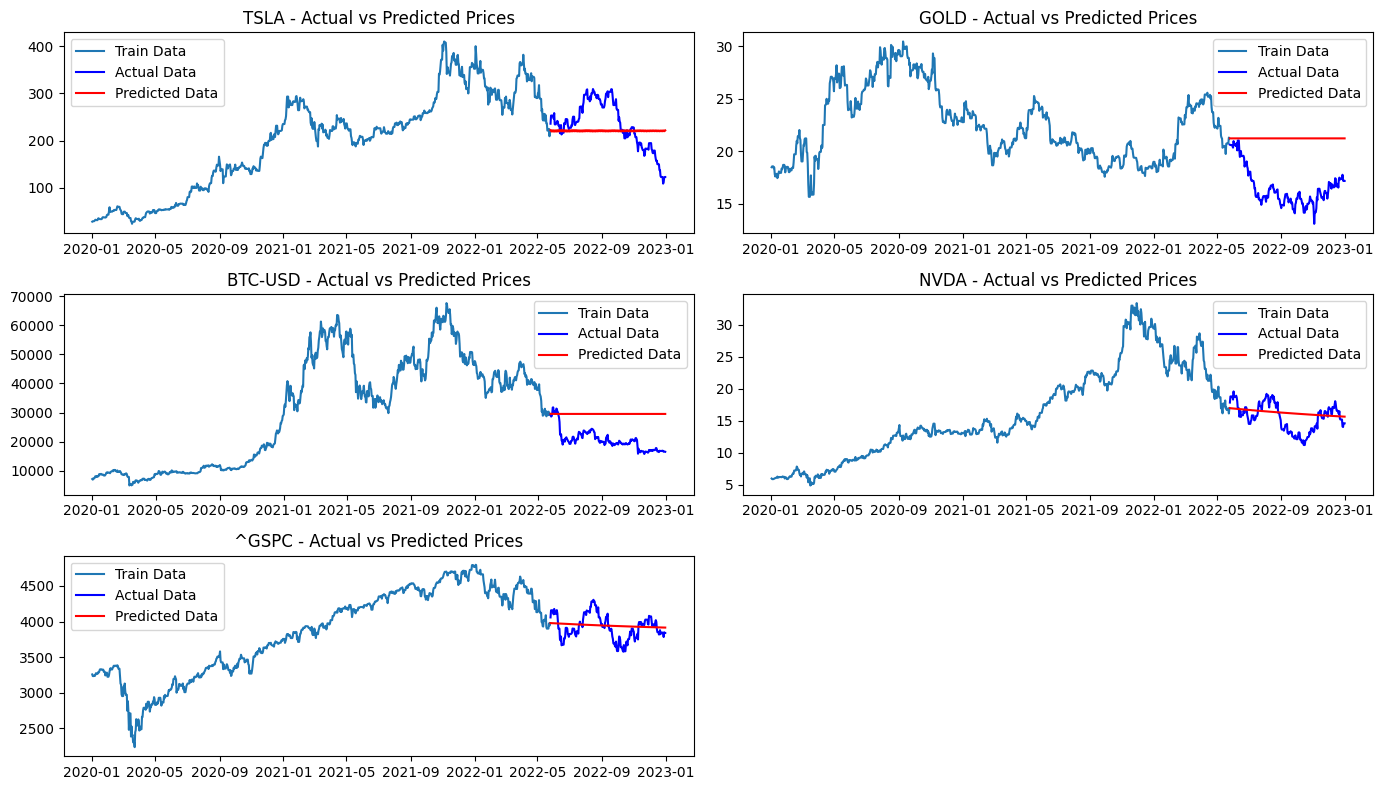

In [4]:
# Train models, predict and calculate error metrics
predictions = {}
mse_results = {}
for ticker in tickers:
    print(f"\nTraining ARIMA model for {ticker}")
    best_model, best_order = find_best_arima_model(train_data[ticker], test_data[ticker])
    print(f"Best ARIMA order for {ticker}: {best_order}")
    predictions[ticker] = best_model.forecast(steps=len(test_data))
    mse_results[ticker] = mean_squared_error(test_data[ticker], predictions[ticker])
    print(f"MSE for {ticker}: {mse_results[ticker]}")

# Calculate Value at Risk (VaR) and Expected Shortfall (ES) for each stock
var_results = {}
es_results = {}
confidence_level = 0.95

for ticker in tickers:
    returns = train_data[ticker].pct_change().dropna()
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    var = norm.ppf(1 - confidence_level) * std_dev - mean_return
    es = mean_return - std_dev * norm.pdf(norm.ppf(1 - confidence_level)) / (1 - confidence_level)
    var_results[ticker] = var
    es_results[ticker] = es
    print(f"\n{ticker} - VaR at {confidence_level*100}% confidence: {var}")
    print(f"{ticker} - Expected Shortfall (ES) at {confidence_level*100}% confidence: {es}")

# Plotting actual vs predicted prices for each stock
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers, 1):
    plt.subplot(3, 2, i)
    plt.plot(train_data[ticker], label="Train Data")
    plt.plot(test_data[ticker], label="Actual Data", color="blue")
    plt.plot(test_data.index, predictions[ticker], label="Predicted Data", color="red")
    plt.title(f"{ticker} - Actual vs Predicted Prices")
    plt.legend()

plt.tight_layout()
plt.show()


### Use Rolling Window to predict the next 20 days data by using ARIMA model

[*********************100%%**********************]  5 of 5 completed
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/charles/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is depr

Predicting for TSLA


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

TSLA - MSE: 42.58103459149675
Predicting for GOLD


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

GOLD - MSE: 0.11288114110088787
Predicting for BTC-USD


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

BTC-USD - MSE: 71610.25321655862
Predicting for NVDA


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

NVDA - MSE: 0.22509091211654658
Predicting for ^GSPC


/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = model_fit.forecast(steps=1)[0]
/var/folders/rr/dlcs78l93lx1k_wv3ptnvswc0000gn/T/ipykernel_20951/3374068356.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posit

^GSPC - MSE: 1554.6712836335928


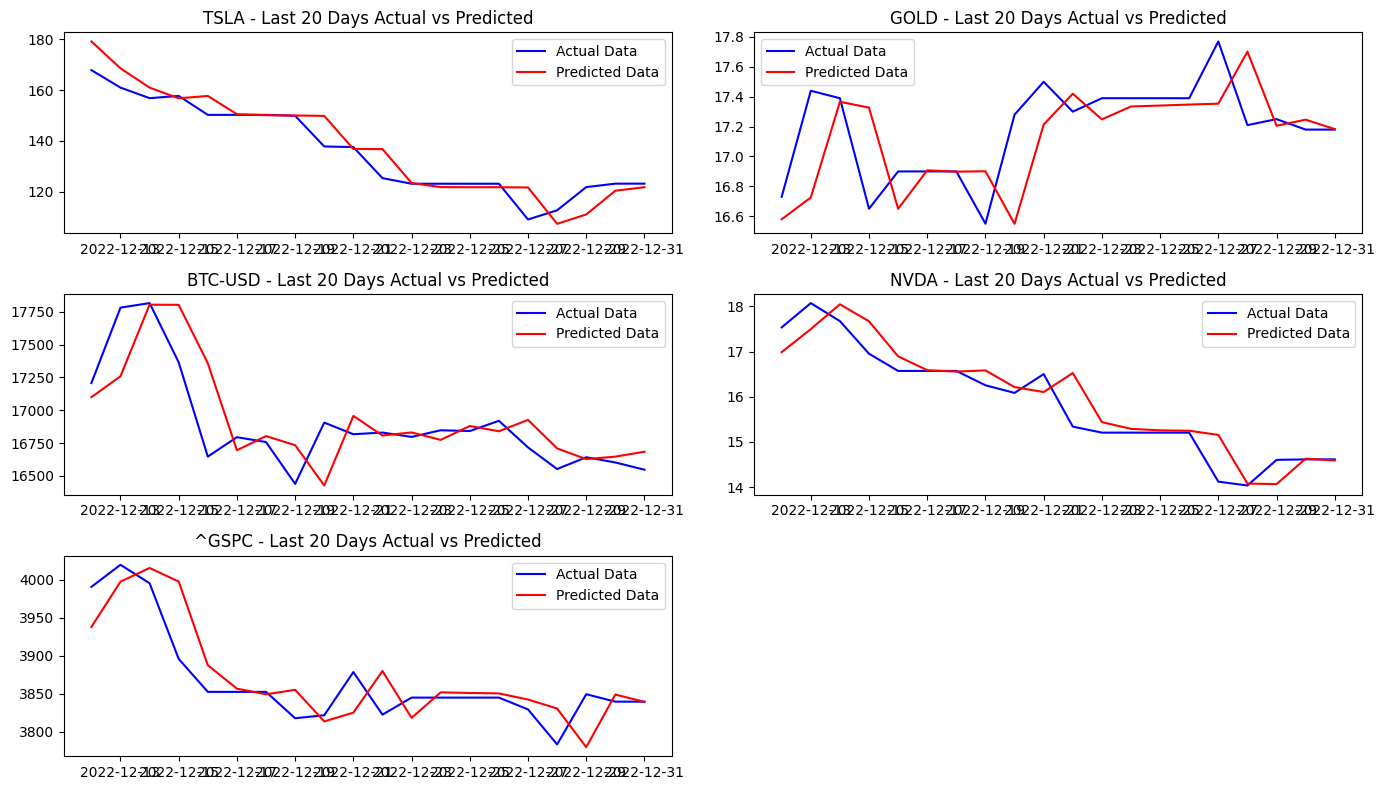

In [ ]:


# Parameters
tickers = ["TSLA", "GOLD", "BTC-USD", "NVDA", "^GSPC"]
rolling_window_size = 60  # Use the past 60 days to predict the next day
forecast_days = 20  # Number of days to forecast at the end

# Gather data
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Close']
data.fillna(method="ffill", inplace=True)

# Function for rolling window ARIMA prediction
def rolling_arima_predictions(series, window_size, forecast_days):
    predictions = []
    for i in range(forecast_days):
        # Define the rolling window for training
        train_series = series[-(window_size + forecast_days - i):-forecast_days + i]
        
        # Fit ARIMA model on the rolling window data
        try:
            model = ARIMA(train_series, order=(1, 1, 1))  # Order can be tuned as needed
            model_fit = model.fit()
            # Forecast the next day (1-step forecast)
            pred = model_fit.forecast(steps=1)[0]
        except:
            # In case ARIMA fails, return the last available value
            pred = train_series.iloc[-1]
        
        predictions.append(pred)
    
    return predictions

# Apply rolling ARIMA prediction for each stock and store the results
all_predictions = {}
all_mse = {}

for ticker in tickers:
    print(f"Predicting for {ticker}")
    actual_values = data[ticker][-forecast_days:]
    predictions = rolling_arima_predictions(data[ticker], rolling_window_size, forecast_days)
    all_predictions[ticker] = predictions
    mse = mean_squared_error(actual_values, predictions)
    all_mse[ticker] = mse
    print(f"{ticker} - MSE: {mse}")

# Plot actual vs. predicted prices for each stock over the last 20 days
plt.figure(figsize=(14, 8))
for i, ticker in enumerate(tickers, 1):
    plt.subplot(3, 2, i)
    plt.plot(data[ticker][-forecast_days:].index, data[ticker][-forecast_days:], label="Actual Data", color="blue")
    plt.plot(data[ticker][-forecast_days:].index, all_predictions[ticker], label="Predicted Data", color="red")
    plt.title(f"{ticker} - Last 20 Days Actual vs Predicted")
    plt.legend()

plt.tight_layout()
plt.show()
